In [1]:
import numpy as np
import pandas as pd

In [45]:
train = pd.read_csv('data/train.csv')
rul = pd.read_csv('data/rul.csv')
test = pd.read_csv('data/test.csv')
print('train shape=' + str(train.shape))
print('test shape=' + str(test.shape))
print('rul shape=' + str(rul.shape))

train shape=(160359, 27)
test shape=(104897, 27)
rul shape=(707, 3)


In [4]:
def get_dataset(df, dataset_id='FD001'):
    return df[df['dataset_id']==dataset_id]

def get_all_data(train_data, test_data, rul_data, dataset_id='FD001'):
    tr = get_dataset(train_data, dataset_id=dataset_id)
    ids = sorted(tr['unit_id'].unique())
    tst = get_dataset(test_data, dataset_id=dataset_id)
    rl = get_dataset(rul_data, dataset_id=dataset_id)
    return (tr, tst, rl, ids)

In [7]:
train1, test1, rul1, id1 = get_all_data(train, test, rul, dataset_id='FD001')

In [46]:
train1.head()

,dataset_id,unit_id,cycle,setting 1,setting 2,setting 3,sensor 1,sensor 2,sensor 3,sensor 4,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21
115008,FD001,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
115009,FD001,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
115010,FD001,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
115011,FD001,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
115012,FD001,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [40]:
train1_desc = train1.describe()
train1_desc.head(8)

,unit_id,cycle,setting 1,setting 2,setting 3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [14]:
def get_relevant_columns(description_data, top=5):
    std_pct = pd.Series(description_data.transpose()['std'] / description_data.transpose()['mean'])
    sensor_cols = sorted([(v, k) for k, v in zip(std_pct.keys(), std_pct.values) if 'sensor' in k], reverse=True)
    return [k for v,k in sensor_cols[:top]]

In [15]:
sensors = get_relevant_columns(train1_desc, top=7)
print(sensors)

['sensor 4', 'sensor 11', 'sensor 20', 'sensor 21', 'sensor 15', 'sensor 17', 'sensor 3']


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
def get_sensor_data(df, name='sensor 4'):
    return [df[df['unit_id']==i+1][name] for i in range(100)]

In [111]:
def plot_data(data):
    plt.figure(figsize=(15,10))
    c = 0
    for j in range(2):
        for i in range(3):
            plt.subplot(2,3,i+j*3+1)
            plt.plot(range(len(data[c])),data[c])
            c += 1    

first 6 unit_id samples for sensor 4


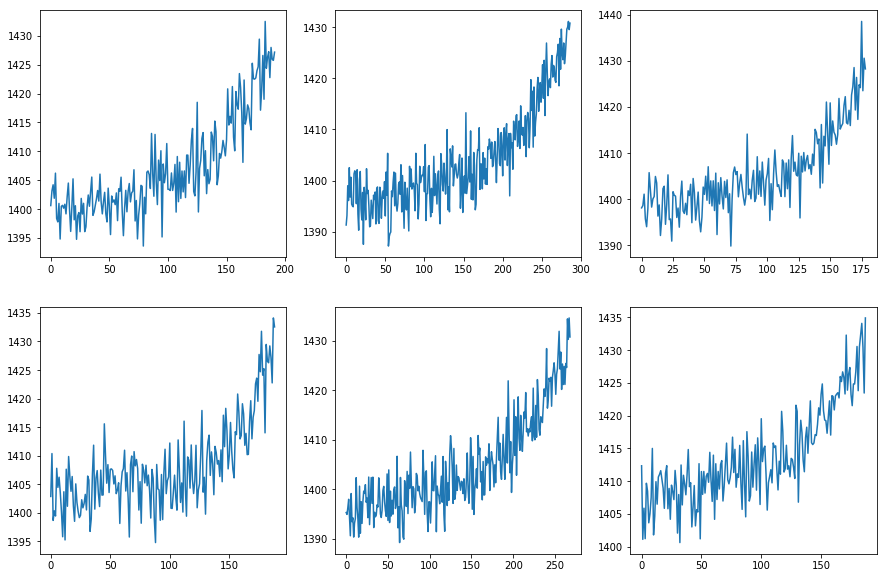

In [112]:
# visualize
print('sensor 4 samples by unit_id')
sensor_data = get_sensor_data(train1, 'sensor 4')
plot_data(sensor_data)
    

first 6 unit_id samples for sensor 11


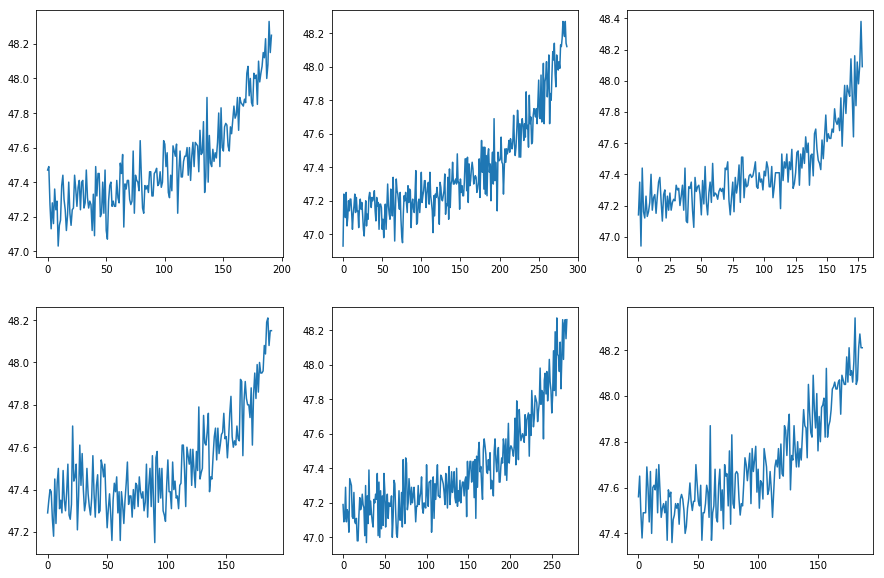

In [113]:
# visualize
print('sensor 11 samples by unit_id')
sensor_data = get_sensor_data(train1, 'sensor 11')
plot_data(sensor_data)


In [18]:
slice_len = 5

def statistic(tseries, slice_len=50, f=np.mean):
    return np.asarray([f(tseries[i:i+slice_len]) for i in range(len(tseries) - slice_len)])

def labels(tseries, slice_len=50):
    return list(range(len(tseries), slice_len, -1))

def abs_mean_error(pred, truth):
    return np.mean(np.abs(pred - truth))

def mean_squared_error(pred, truth):
    return np.mean((pred - truth)*(pred - truth))

In [19]:
def predict(model, test_data):
    res = []
    for i in id1:
        X_test = [np.asarray(test_data[test_data['unit_id'] == i][s]) for s in sensors]
        X_stat_test = np.asarray([statistic(tseries=x[(x.shape[0]-slice_len-1):], slice_len=slice_len, f=np.mean) for x in X_test]).flatten()
        y_pred = model.predict(X_stat_test.reshape(1, -1))
        res.append(y_pred[0])
    
    return np.asarray(res)

In [20]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [21]:
def get_model():
    #return LogisticRegression() # top5=29.3
    #return svm.SVR() # top5=33.9 [28,61,74,98,37]
    #return svm.SVC() # top5=21.2 [91,36,19,39,8]; 21.5 [8,80,91,52,5]
    #return tree.DecisionTreeClassifier(max_depth=3, random_state=0) # top5=39.8 [91,22,39,80,19]
    #return tree.DecisionTreeRegressor(criterion='mae', max_depth=3, random_state=0) # top5=21.7 [8,91,85,39,7]; 20.8 [8,6,52,91,39]; slice=5: 18.8 [39,29,27,99,70]
    #return RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0) # top5=18.6 [47,7,91,36,12]; 17.5 [8,37,29,60,58]; 20.5 [85,58,77,37,45]; 20.6 [85,58,77,37,45]; 18.9 [11,99,78,77,58]
    # slice_len=15: 19.45; slice_len=7: 19.1; slice_len=5: 18.1; slice_len=3: 18.6; slice_len=1: 19.0
    return RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0) # top5=18.1 [65,29,74,93,39]
    #return RandomForestRegressor(n_estimators=10, max_depth=3, random_state=0) # top5=21.4 [91,39,8,85,36]; 19.1 [39,70,27,29,77]
    #return AdaBoostClassifier(random_state=0) # top5=21.1 [57,65,91,44,17]
    #return AdaBoostRegressor(n_estimators=50, random_state=0) # top5=21.2
    #return GradientBoostingClassifier(n_estimators=10) # top5=20.2; [91,19,8,36,13]
    #return GaussianNB() # top5=22.2 [91,36,19,39,8]


In [22]:
def train_by_unit(unit_id, train_data):
    X_ls = [np.asarray(train_data[train_data['unit_id'] == unit_id][s]) for s in sensors]
    X0 = np.asarray([statistic(tseries=x, slice_len=slice_len, f=np.mean) for x in X_ls]).transpose()
    y0 = labels(X_ls[0], slice_len=slice_len)
    model = get_model()
    model = model.fit(X0, y0)
    return model

def train_and_predict(train_data, test_data, rul_data, unit_ids):
    res = []
    all_preds = []
    for i in unit_ids:
        m = train_by_unit(i, train_data)
        y_pred = predict(m, test_data)
        res.append((abs_mean_error(y_pred, rul_data), i))
        all_preds.append(y_pred)

    return sorted(res), all_preds

In [30]:
#baseline estimate with constant prediction.
test_error = sorted([(abs_mean_error(i, rul1['rul']),i) for i in range(20,120)])[0] # dataset1 constant 85 gives 35.9
test_error_mse = sorted([(mean_squared_error(i, rul1['rul']),i) for i in range(20,120)])[0]
print('baseline errors with const prediction. ' + 'mae/const: ' + str(test_error), '| mse/const: ' + str(test_error_mse))

baseline estimates with const prediction. mae/const: (35.9, 85) | mse/const: (1727.1, 76)


In [31]:
# this step can takes some time: dataset1 runs approx 1min on laptop
preds, all_preds = train_and_predict(train1, test1, rul1['rul'], id1)

In [35]:
top_id = [y-1 for x,y in preds[:5]]
y_pred = np.mean(np.asarray([all_preds[i] for i in top_id]), axis=0)
test_error = abs_mean_error(y_pred, rul1['rul'])
test_error_mse = mean_squared_error(y_pred, rul1['rul'])
print('predictions errors. ' + 'mae: ' + str(round(test_error,2)), '| mse: ' + str(round(test_error_mse,2)))
print('top5 predicting unit_id-s: ' + str(top_id))

predictions errors. mae: 18.12 | mse: 558.46
top5 predicting unit_id-s: [64, 28, 73, 92, 38]


In [1]:
errors = pd.DataFrame(rul1['unit_id'])
errors['rul'] = rul1['rul']
errors['pred'] = y_pred
errors['err_pct'] = errors['pred'] / errors['rul'] - 1
errors['err_pct_abs'] = abs(errors['err_pct'])
#errors.sort('err_pct_abs')
errors.head(10)

NameError: name 'pd' is not defined